In [ ]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plotly has been used for visualization
import plotly as py
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")    # (Optional)

In [ ]:
pip install colorama


In [ ]:

# 加载数据
data_path = '/content/drive/MyDrive/546-project/CC GENERAL.csv'
df = pd.read_csv(data_path)

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_copy=df.copy()

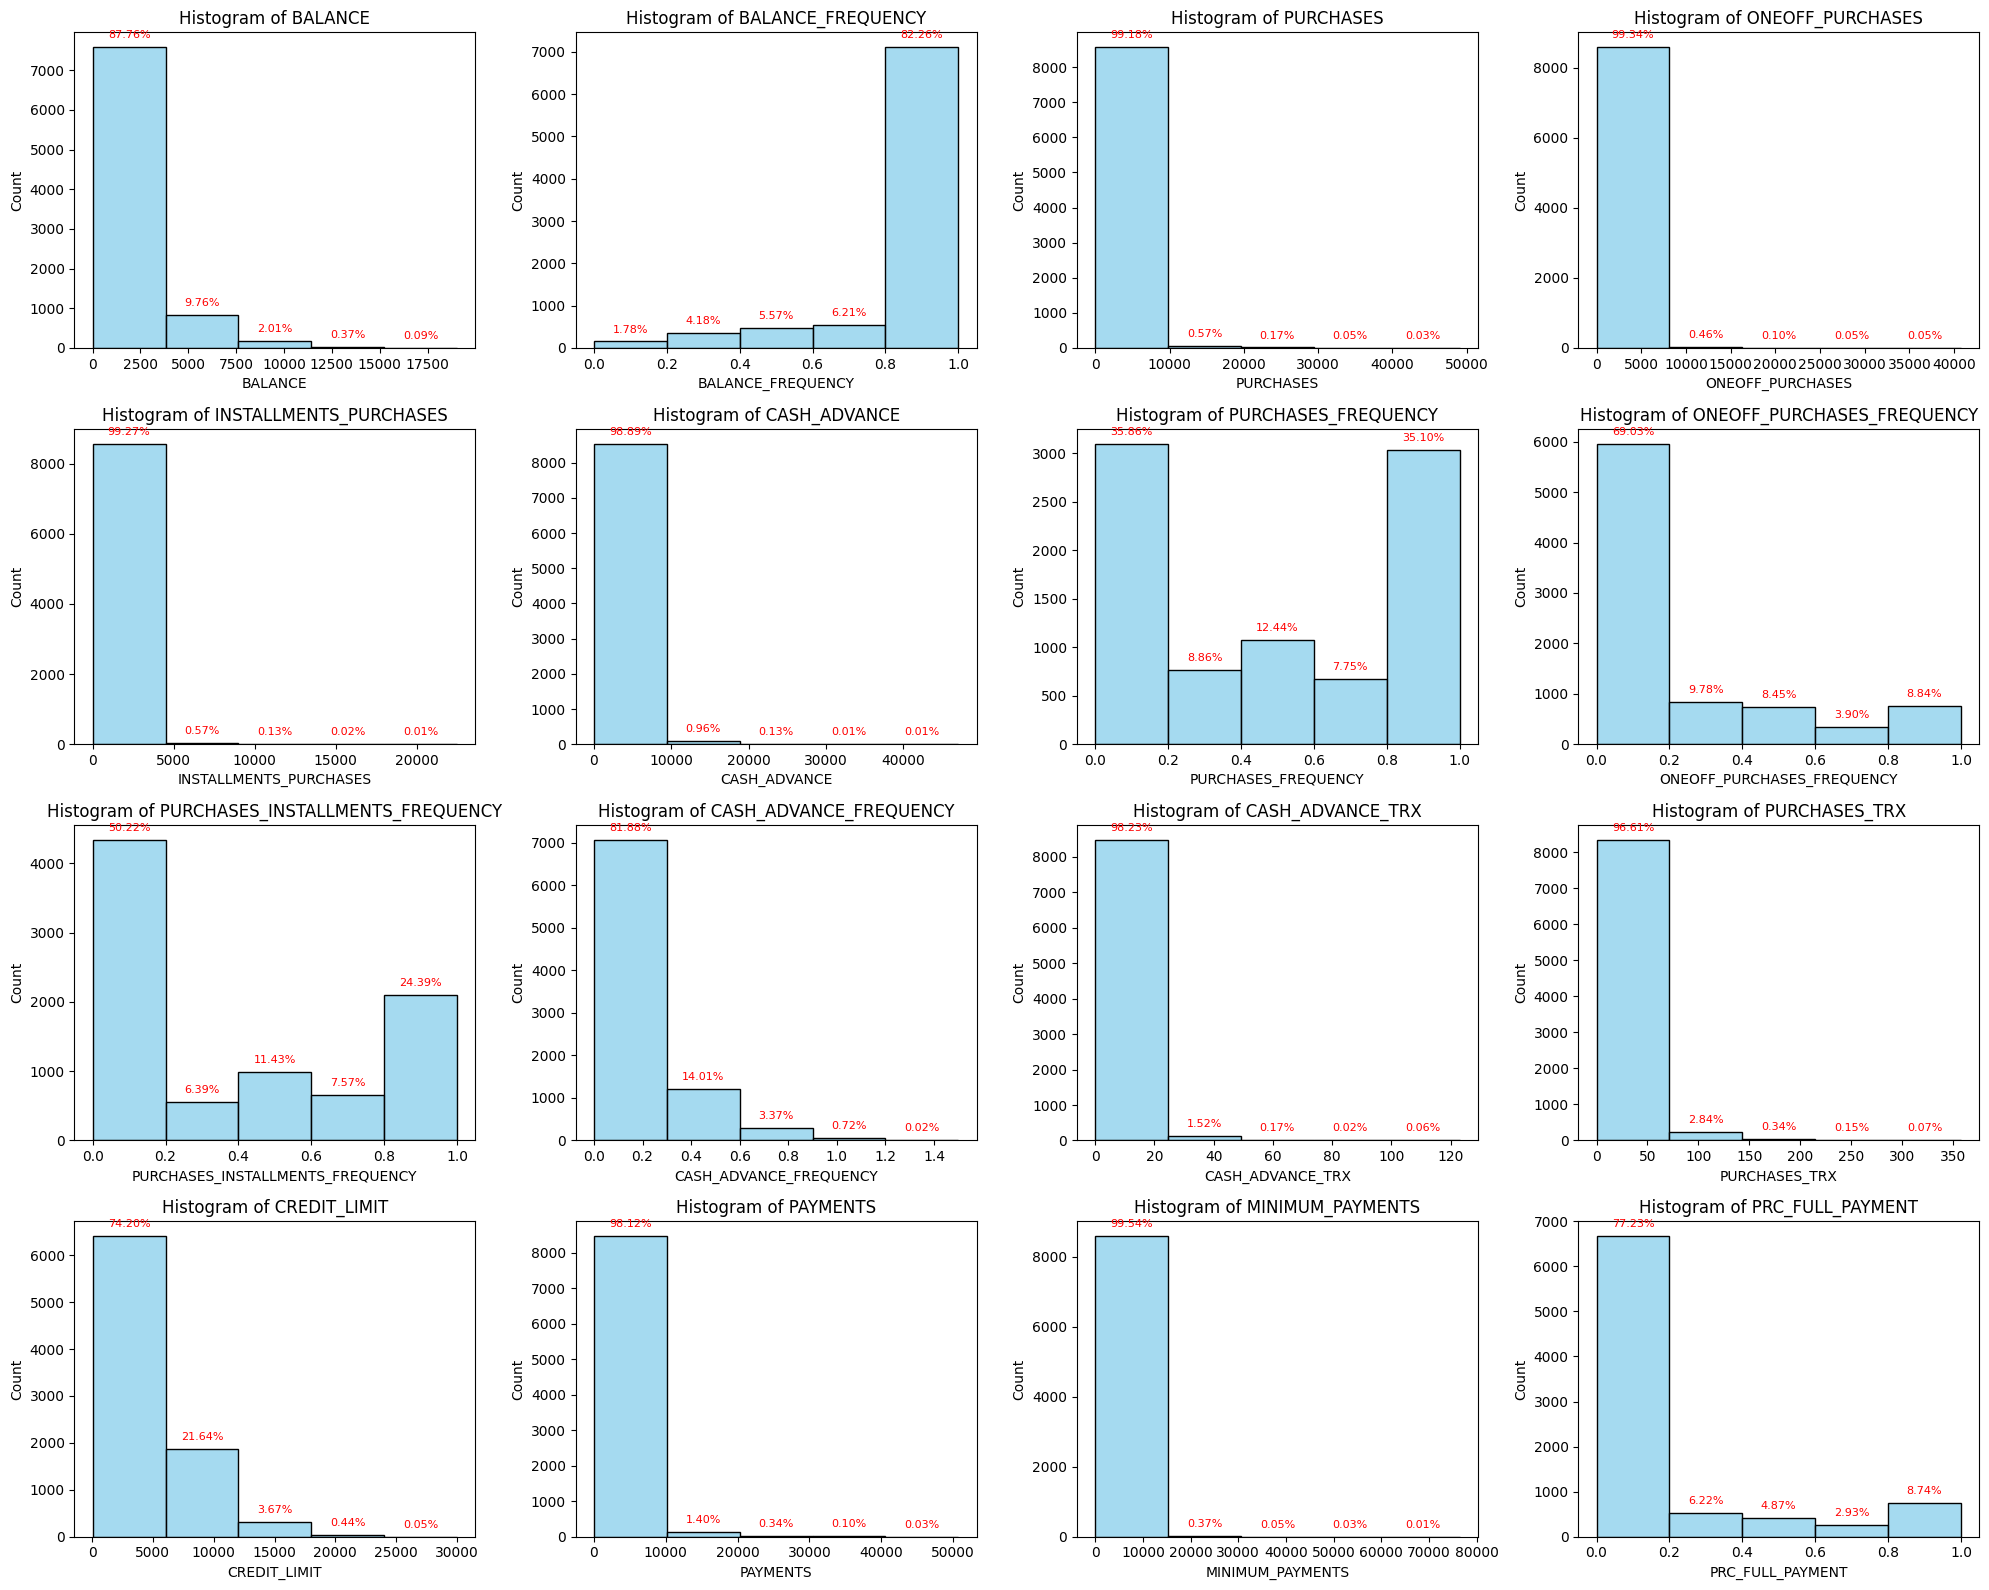

In [ ]:
columns_of_interest = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
# 重新定义 columns_of_interest 和 selected_data 以确保使用正确的 DataFrame 数据
selected_data = df[columns_of_interest].dropna()  # 使用前面转换后的数据

# 多子图布局
n_features = len(columns_of_interest)
n_cols = 4  # 每行显示4个子图
n_rows = (n_features + n_cols - 1) // n_cols  # 计算所需的行数

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))  # 创建子图网格
axes = axes.flatten()  # 将二维数组展平以便迭代

for i, column in enumerate(columns_of_interest):
    # 绘制直方图
    sns.histplot(selected_data[column], bins=5, kde=False, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Histogram of {column}')

    # 计算每个桶的百分比
    counts, bins = np.histogram(selected_data[column], bins=5)
    percentages = (counts / len(selected_data[column])) * 100

    # 在每个桶上注释百分比
    for count, bin_edge, percentage in zip(counts, bins[:-1], percentages):
        axes[i].annotate(f'{percentage:.2f}%', xy=(bin_edge + np.diff(bins)[0] / 2, count),
                         xytext=(0, 5), textcoords='offset points', ha='center', va='bottom',
                         fontsize=8, color='red')

# 关闭剩余的子图（如果有的话）
for j in range(i + 1, n_cols * n_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


1.CUST_ID：信用卡持有人的身份（分类）

2.BALANCE：其帐户中用于购买的余额金额

3.BALANCE_FREQUENCY：余额更新的频率，分数介于 0 和 1 之间（1 = 经常更新，0 = 不经常更新）

4.PURCHASES：从帐户进行的购买金额

5.ONEOFF_PURCHASES：一次性完成的最大购买金额

6.INSTALLMENTS_PURCHASES：分期完成的购买金额

7.CASH_ADVANCE：用户预付的现金

8.PURCHASES_FREQUENCY：进行购买的频率，评分在 0 到 1 之间（1 = 经常购买，0 = 不经常购买）

9.ONEOFFPURCHASESFREQUENCY：一次性购买的频率（1 = 经常购买，0 = 不经常购买）

10.PURCHASESINSTALLMENTSFREQUENCY：分期购买的频率（1 = 经常购买，0 = 不经常进行）

11.CASHADVANCEFREQUENCY : 预付现金的频率

12.CASHADVANCETRX : 使用“预付现金”进行的交易数量

13.PURCHASES_TRX : 进行的购买交易数量

14.CREDIT_LIMIT : 用户信用卡限额

15.PAYMENTS : 用户完成的付款金额

16.MINIMUM_PAYMENTS：用户支付的最低金额

17.PRCFULLPAYMENT：用户支付的全额付款的百分比

18.TENURE：用户信用卡服务的期限

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
#overview

df_overview = []
columns = df . columns . drop("CUST_ID")
for i in columns :
    types = df[i] . dtypes
    unique_data = df[i] . nunique()

    missing_count=df[i].isnull().sum()
    value_count= df[i].isnull().count()
    missing_percentage= round(missing_count/value_count*100,2)

    duplicated= df.duplicated().sum()
    df_overview . append ([i , types , unique_data , missing_count, missing_percentage,duplicated])

df_info = pd . DataFrame (df_overview)
df_info . columns =['name of column' , 'types' ,'unique_data' , 'missing value', "missing percentage","duplicated"]




df_info.style.highlight_max(color = 'aqua', axis = 0)

,name of column,types,unique_data,missing value,missing percentage,duplicated
0,BALANCE,float64,8871,0,0.000000,0
1,BALANCE_FREQUENCY,float64,43,0,0.000000,0
2,PURCHASES,float64,6203,0,0.000000,0
3,ONEOFF_PURCHASES,float64,4014,0,0.000000,0
4,INSTALLMENTS_PURCHASES,float64,4452,0,0.000000,0
5,CASH_ADVANCE,float64,4323,0,0.000000,0
6,PURCHASES_FREQUENCY,float64,47,0,0.000000,0
7,ONEOFF_PURCHASES_FREQUENCY,float64,47,0,0.000000,0
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.000000,0
9,CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000,0


In [ ]:
df.drop('CUST_ID', axis=1, inplace = True)

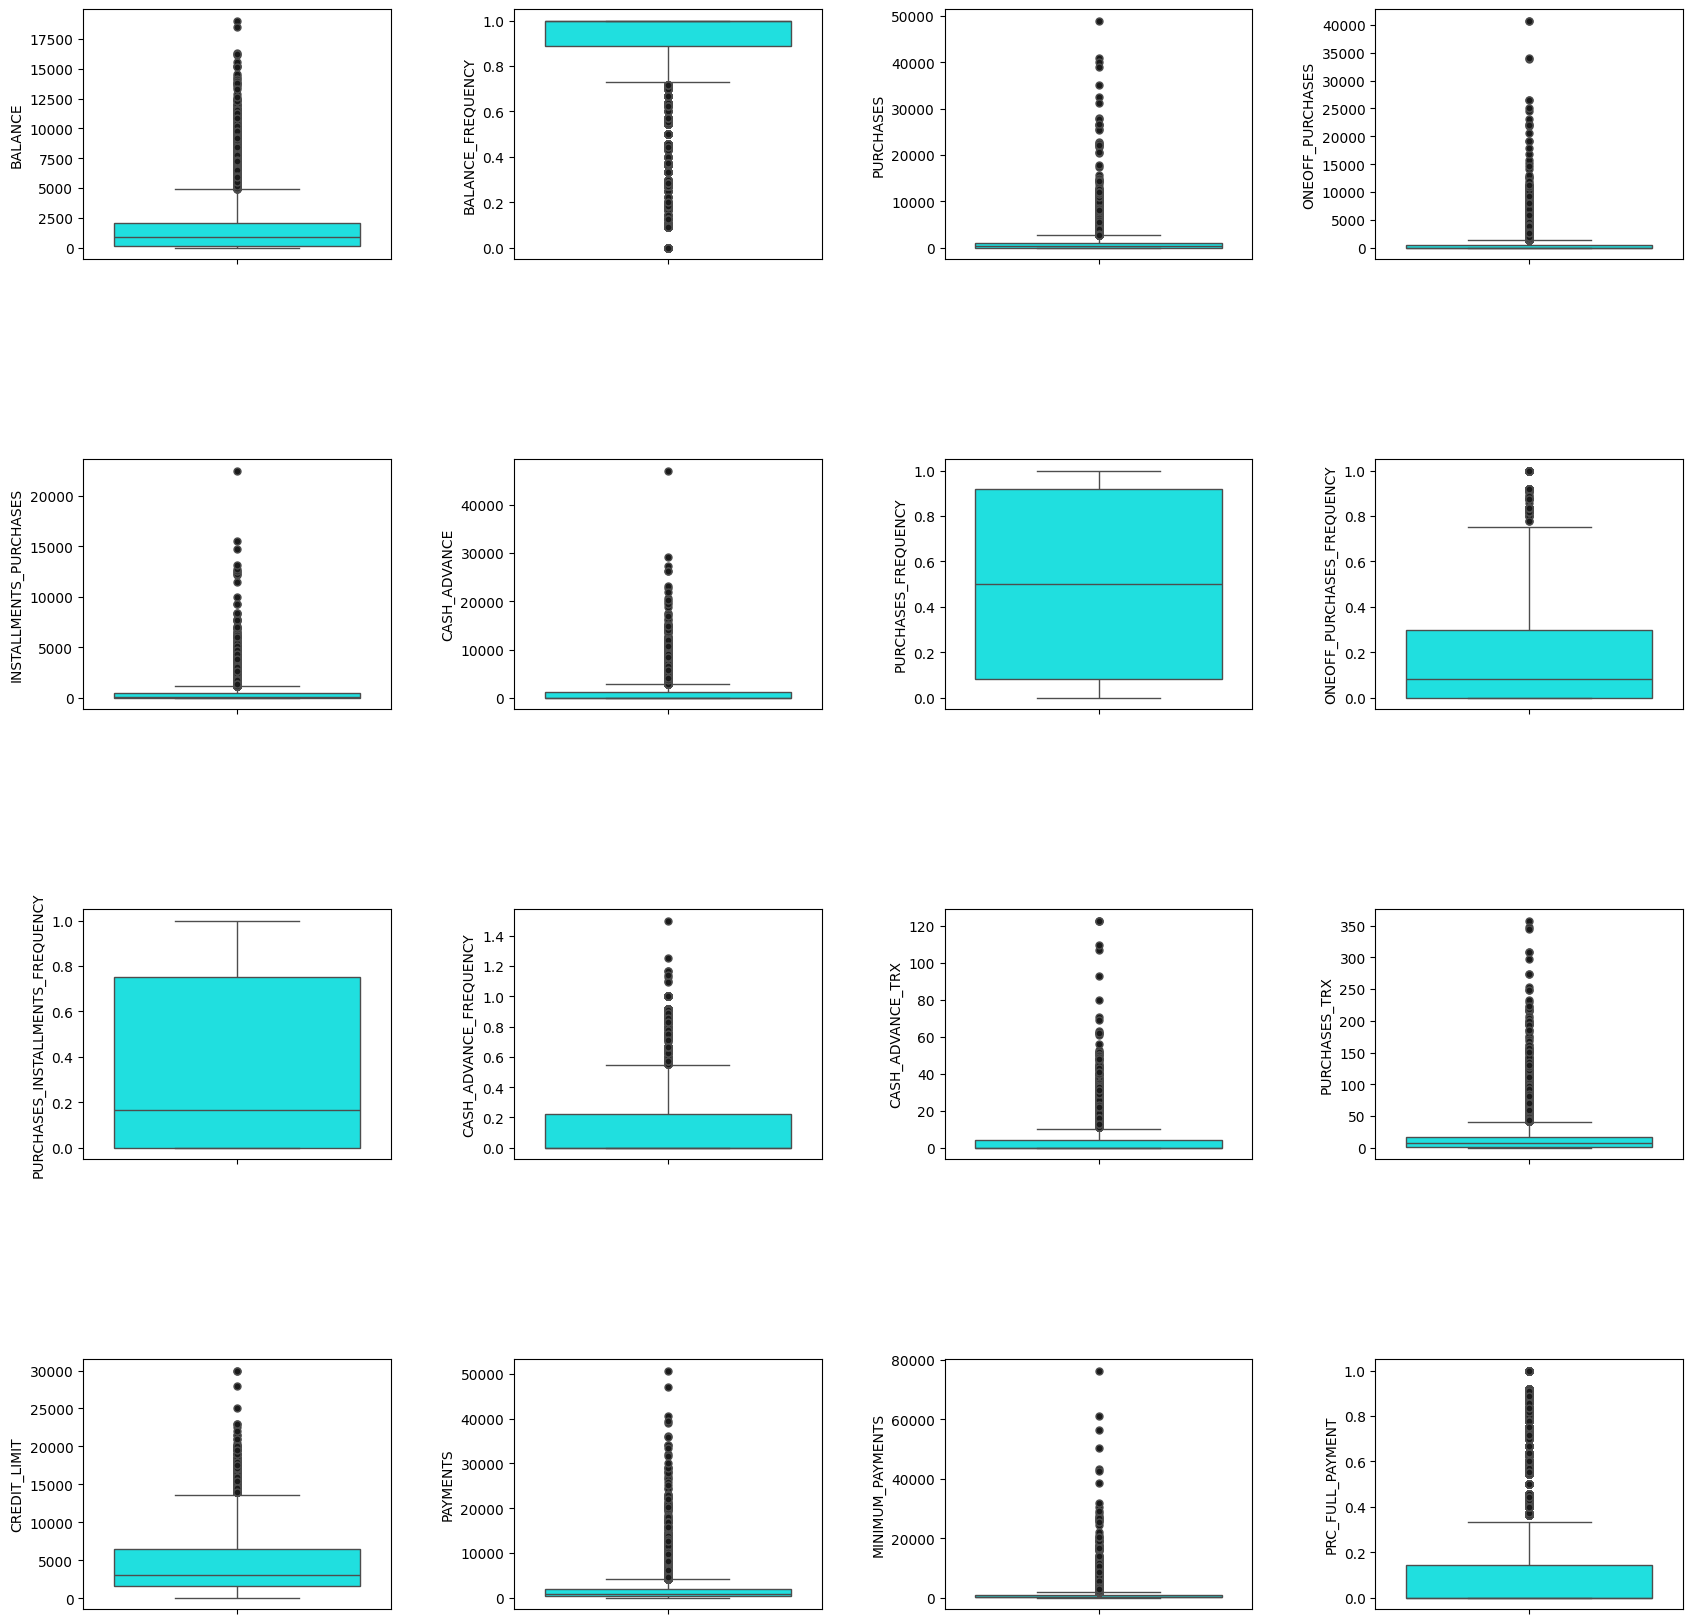

In [ ]:
#Using Box plot

plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i in range (len(df.columns)-1):

    plt.subplot(4,4,i+1)
    sns.boxplot(df[df.columns[i]], color='aqua',flierprops = dict(markerfacecolor = '0.10', markersize = 5))




In [ ]:
#finding outliers base on the Inter Quantile Range(IQR)
# 找到异常值，并统计每列异常值的数量
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

count_out = df[(df <  (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].count()


df_count_out = pd.DataFrame(count_out, columns=['count_out'])
df_count_out


,count_out
BALANCE,695
BALANCE_FREQUENCY,1493
PURCHASES,808
ONEOFF_PURCHASES,1013
INSTALLMENTS_PURCHASES,867
CASH_ADVANCE,1030
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,782
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,525


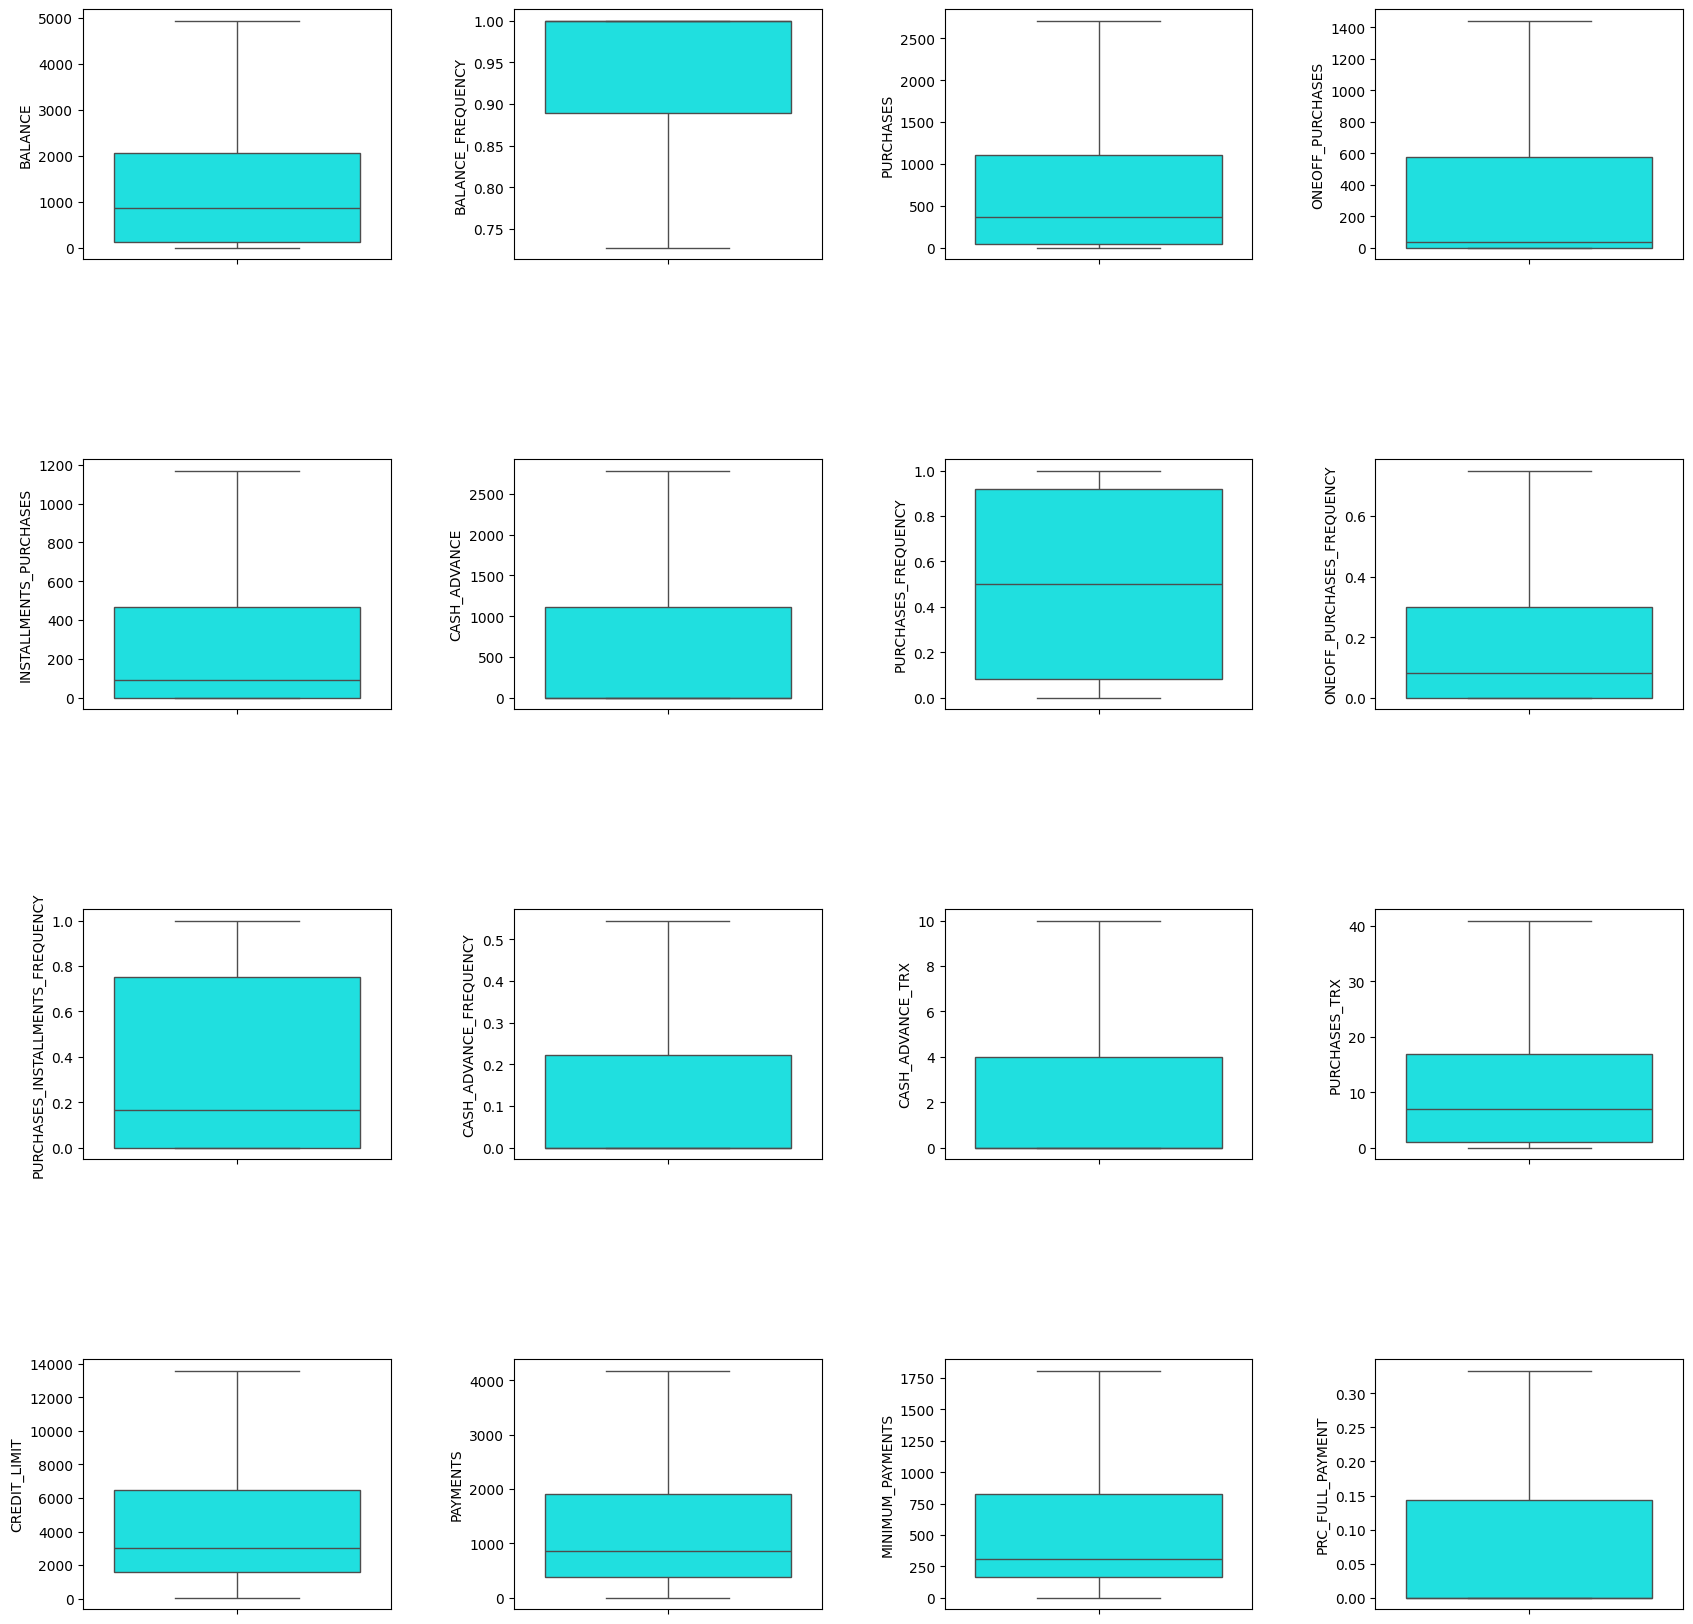

In [ ]:
#修正异常值
plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
#showfliers = False 不显示异常值
for i in range (len(df.columns)-1):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[df.columns[i]],showfliers = False ,color='aqua')


In [ ]:
# missing values in 'CREDIT_LIMIT' column(this column has one missing value)
nulls_value = pd.isnull(df["CREDIT_LIMIT"])
df[nulls_value]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [ ]:
df.drop(columns=['PURCHASES_INSTALLMENTS_FREQUENCY',
                      'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY' ], inplace=True)

In [ ]:
df.drop([5203], axis=0, inplace=True)#去除缺失值
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df.skew()

BALANCE                        2.393270
BALANCE_FREQUENCY             -2.024193
PURCHASES                      8.143969
INSTALLMENTS_PURCHASES         7.298823
CASH_ADVANCE                   5.166323
PURCHASES_FREQUENCY            0.059970
ONEOFF_PURCHASES_FREQUENCY     1.535453
CASH_ADVANCE_TRX               5.720976
PURCHASES_TRX                  4.630493
CREDIT_LIMIT                   1.522464
PAYMENTS                       5.907465
MINIMUM_PAYMENTS              13.622193
PRC_FULL_PAYMENT               1.942641
TENURE                        -2.944788
dtype: float64

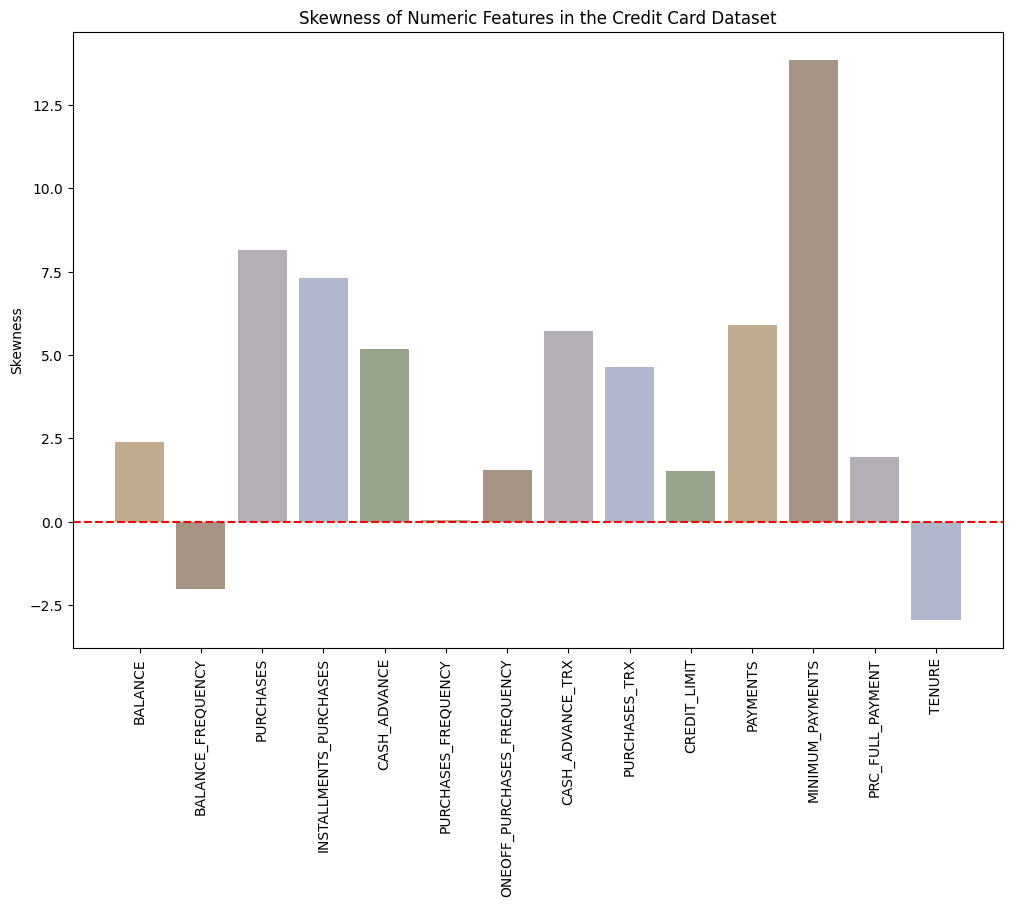

In [ ]:
# 处理缺失值，这里简单地使用中位数填充
df.fillna(df.median(), inplace=True)

# 计算数值列的偏度
numeric_columns = df.select_dtypes(include=[np.number]).columns
skew_values = df[numeric_columns].skew()

# 为每个条形生成一个随机颜色
colors =   ["#C0AB8E",  # 类似沙色
    "#A69585",  # 暖灰
    "#B4AEB7",  # 灰紫
    "#B1B8CE",  # 淡蓝灰
    "#96A48B",  # 淡灰绿
]

# 可视化偏度，并为每个条形指定颜色
plt.figure(figsize=(12, 8))
barplot = plt.bar(skew_values.index, skew_values.values, color=colors)
plt.title('Skewness of Numeric Features in the Credit Card Dataset')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.axhline(0, color='red', linestyle='--')
plt.show()

当偏度值显著大于0时，如 PURCHASES（8.14）、INSTALLMENTS_PURCHASES（7.30）、MINIMUM_PAYMENTS（13.62），表明数据右尾特别长，分布非常不均衡。
当偏度值显著小于0时，如 BALANCE_FREQUENCY（-2.02）、TENURE（-2.94），表明数据左尾较长。

In [ ]:
skewness_features = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                     'PAYMENTS', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']
df[skewness_features] = np.log(df[skewness_features] + 0.1)

<Figure size 640x480 with 0 Axes>

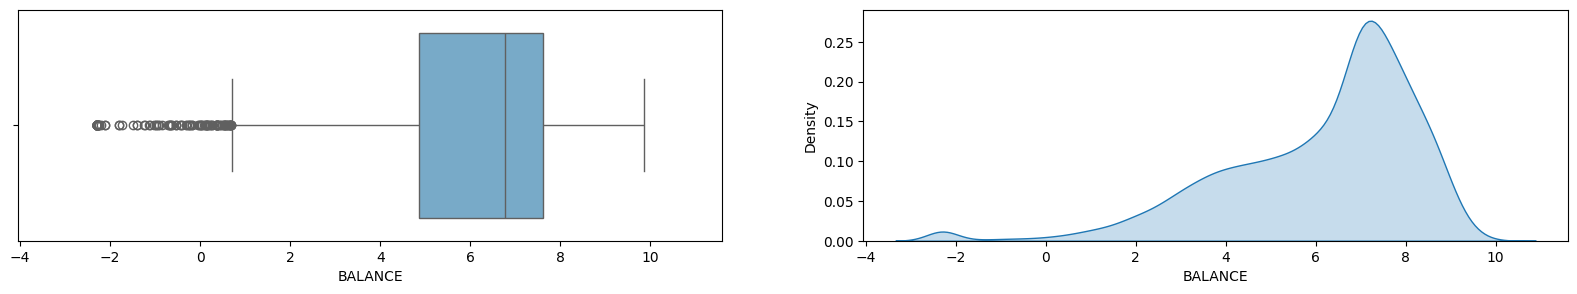

<Figure size 2000x300 with 0 Axes>

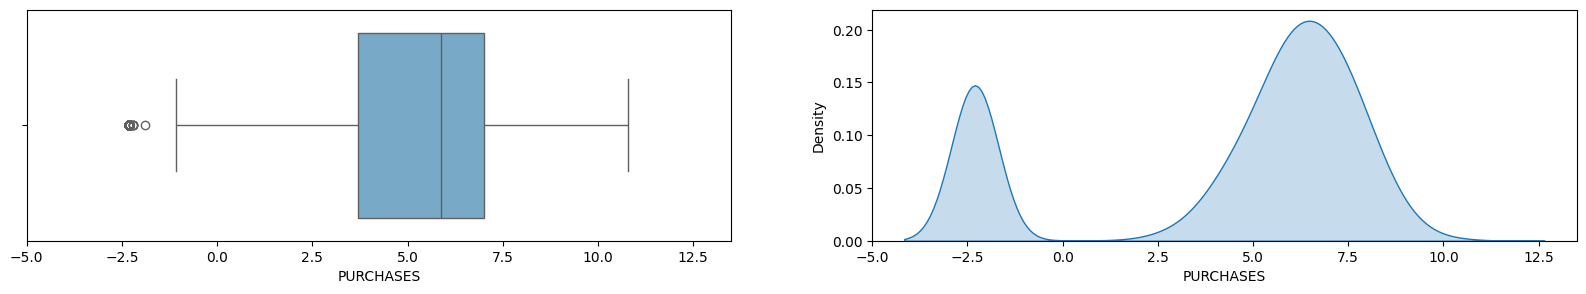

<Figure size 2000x300 with 0 Axes>

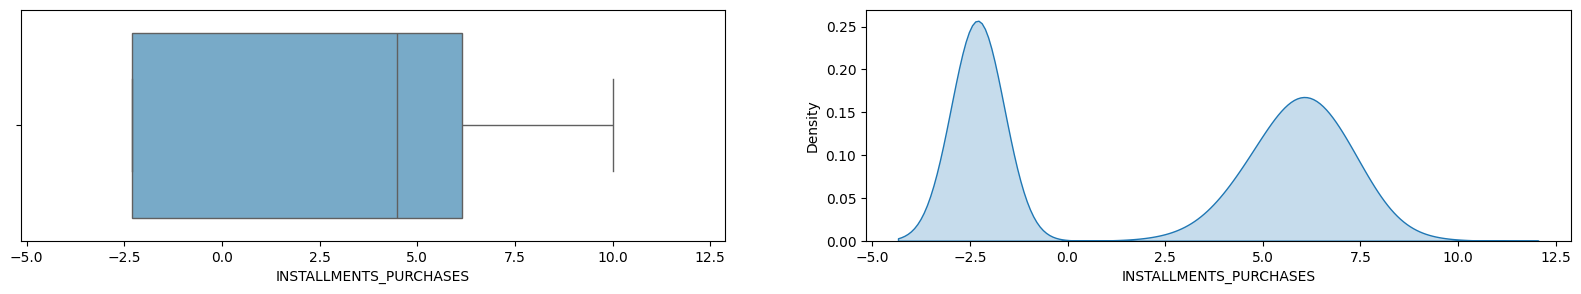

<Figure size 2000x300 with 0 Axes>

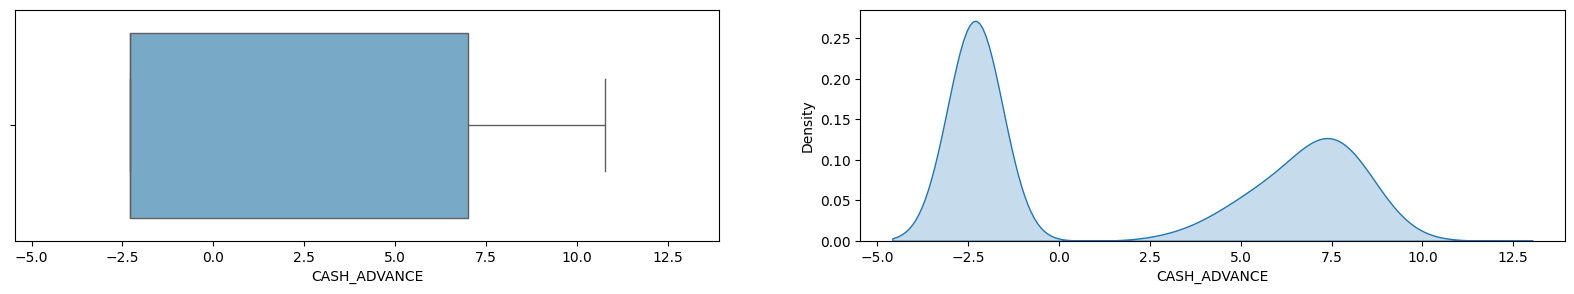

<Figure size 2000x300 with 0 Axes>

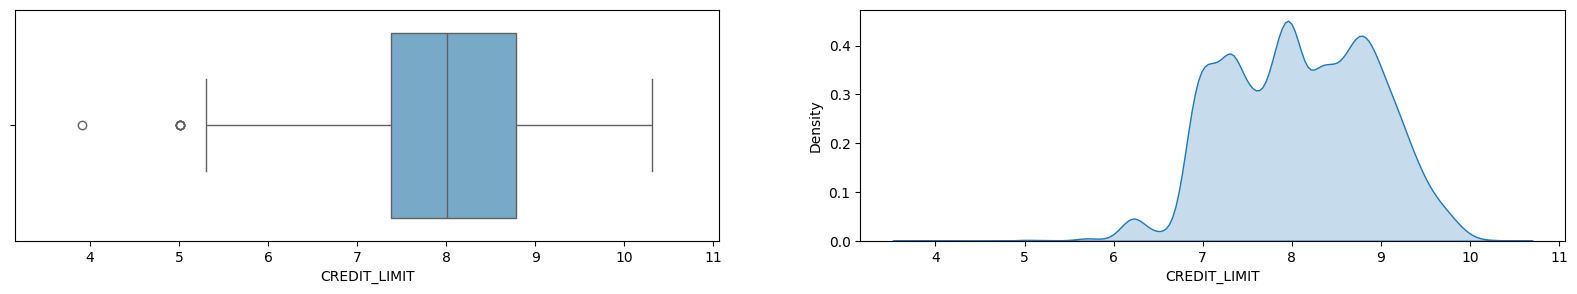

<Figure size 2000x300 with 0 Axes>

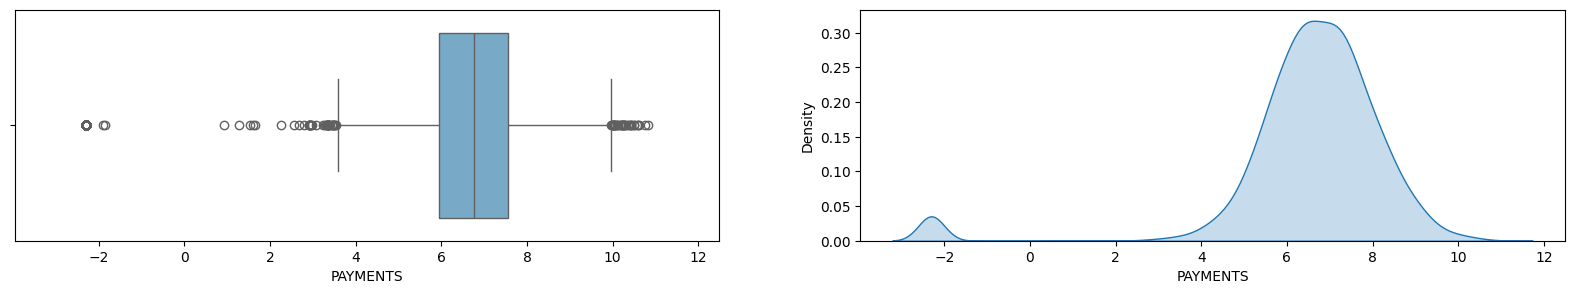

<Figure size 2000x300 with 0 Axes>

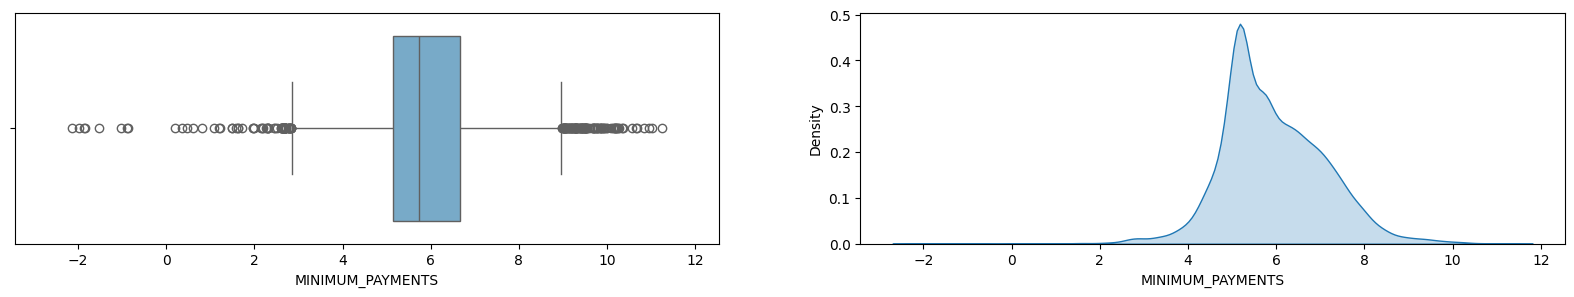

<Figure size 2000x300 with 0 Axes>

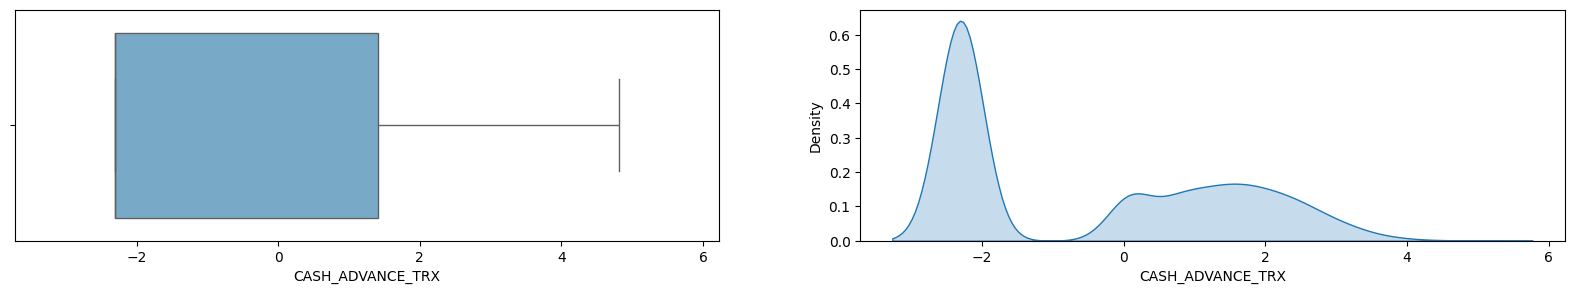

<Figure size 2000x300 with 0 Axes>

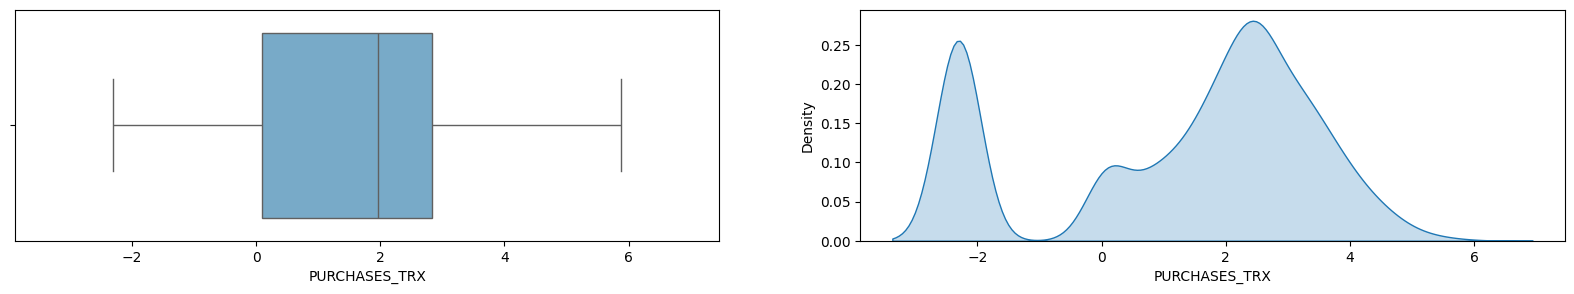

In [ ]:
from matplotlib import rcParams
for col in list(df[skewness_features].columns):
    if df[col].nunique() > 7:
        plt.figure();
        rcParams['figure.figsize'] = (20, 3);
        fig, (ax_box, ax_kde) = plt.subplots(ncols=2, sharex=True);
        plt.gca().set(xlabel=col, ylabel='Density');
        sns.boxplot(x = col, ax=ax_box, linewidth=1.0, palette='Blues', data=df);  # Switched x to y
        sns.kdeplot(df[col], ax=ax_kde, fill=True, palette='Blues');
        plt.show();

In [ ]:
df.skew()

BALANCE                      -1.178399
BALANCE_FREQUENCY            -2.024193
PURCHASES                    -0.971036
INSTALLMENTS_PURCHASES       -0.124961
CASH_ADVANCE                  0.185856
PURCHASES_FREQUENCY           0.059970
ONEOFF_PURCHASES_FREQUENCY    1.535453
CASH_ADVANCE_TRX              0.410488
PURCHASES_TRX                -0.582282
CREDIT_LIMIT                 -0.102317
PAYMENTS                     -2.730197
MINIMUM_PAYMENTS              0.118761
PRC_FULL_PAYMENT              1.942641
TENURE                       -2.944788
dtype: float64

<Axes: >

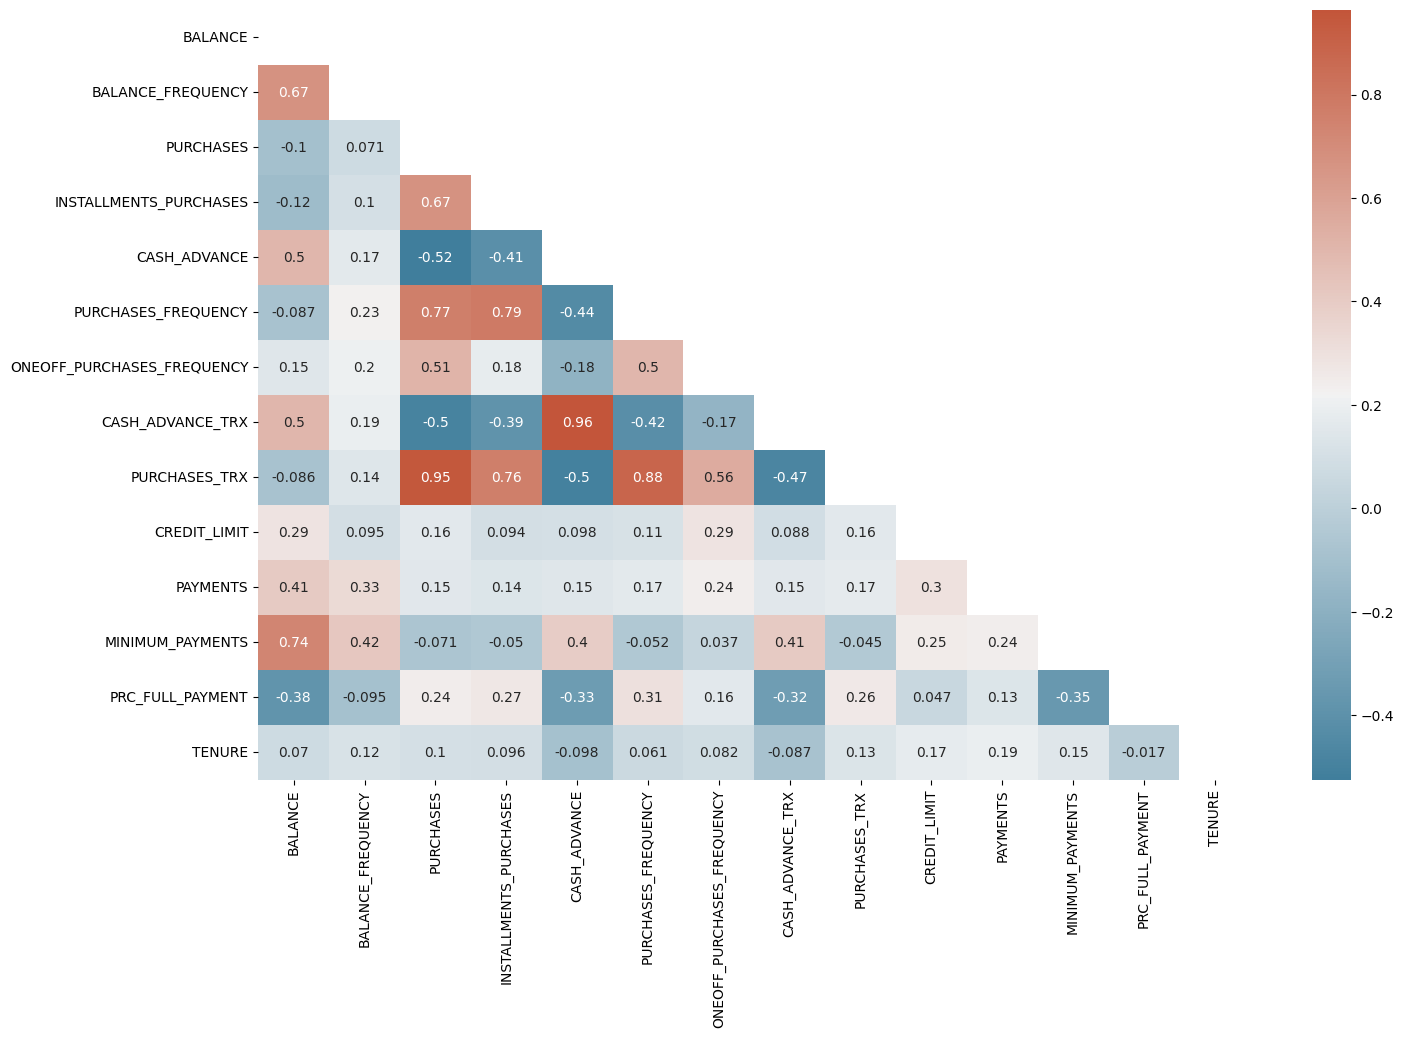

In [ ]:
#correlation
corr = df.corr()

f, ax = plt.subplots(figsize=(16, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

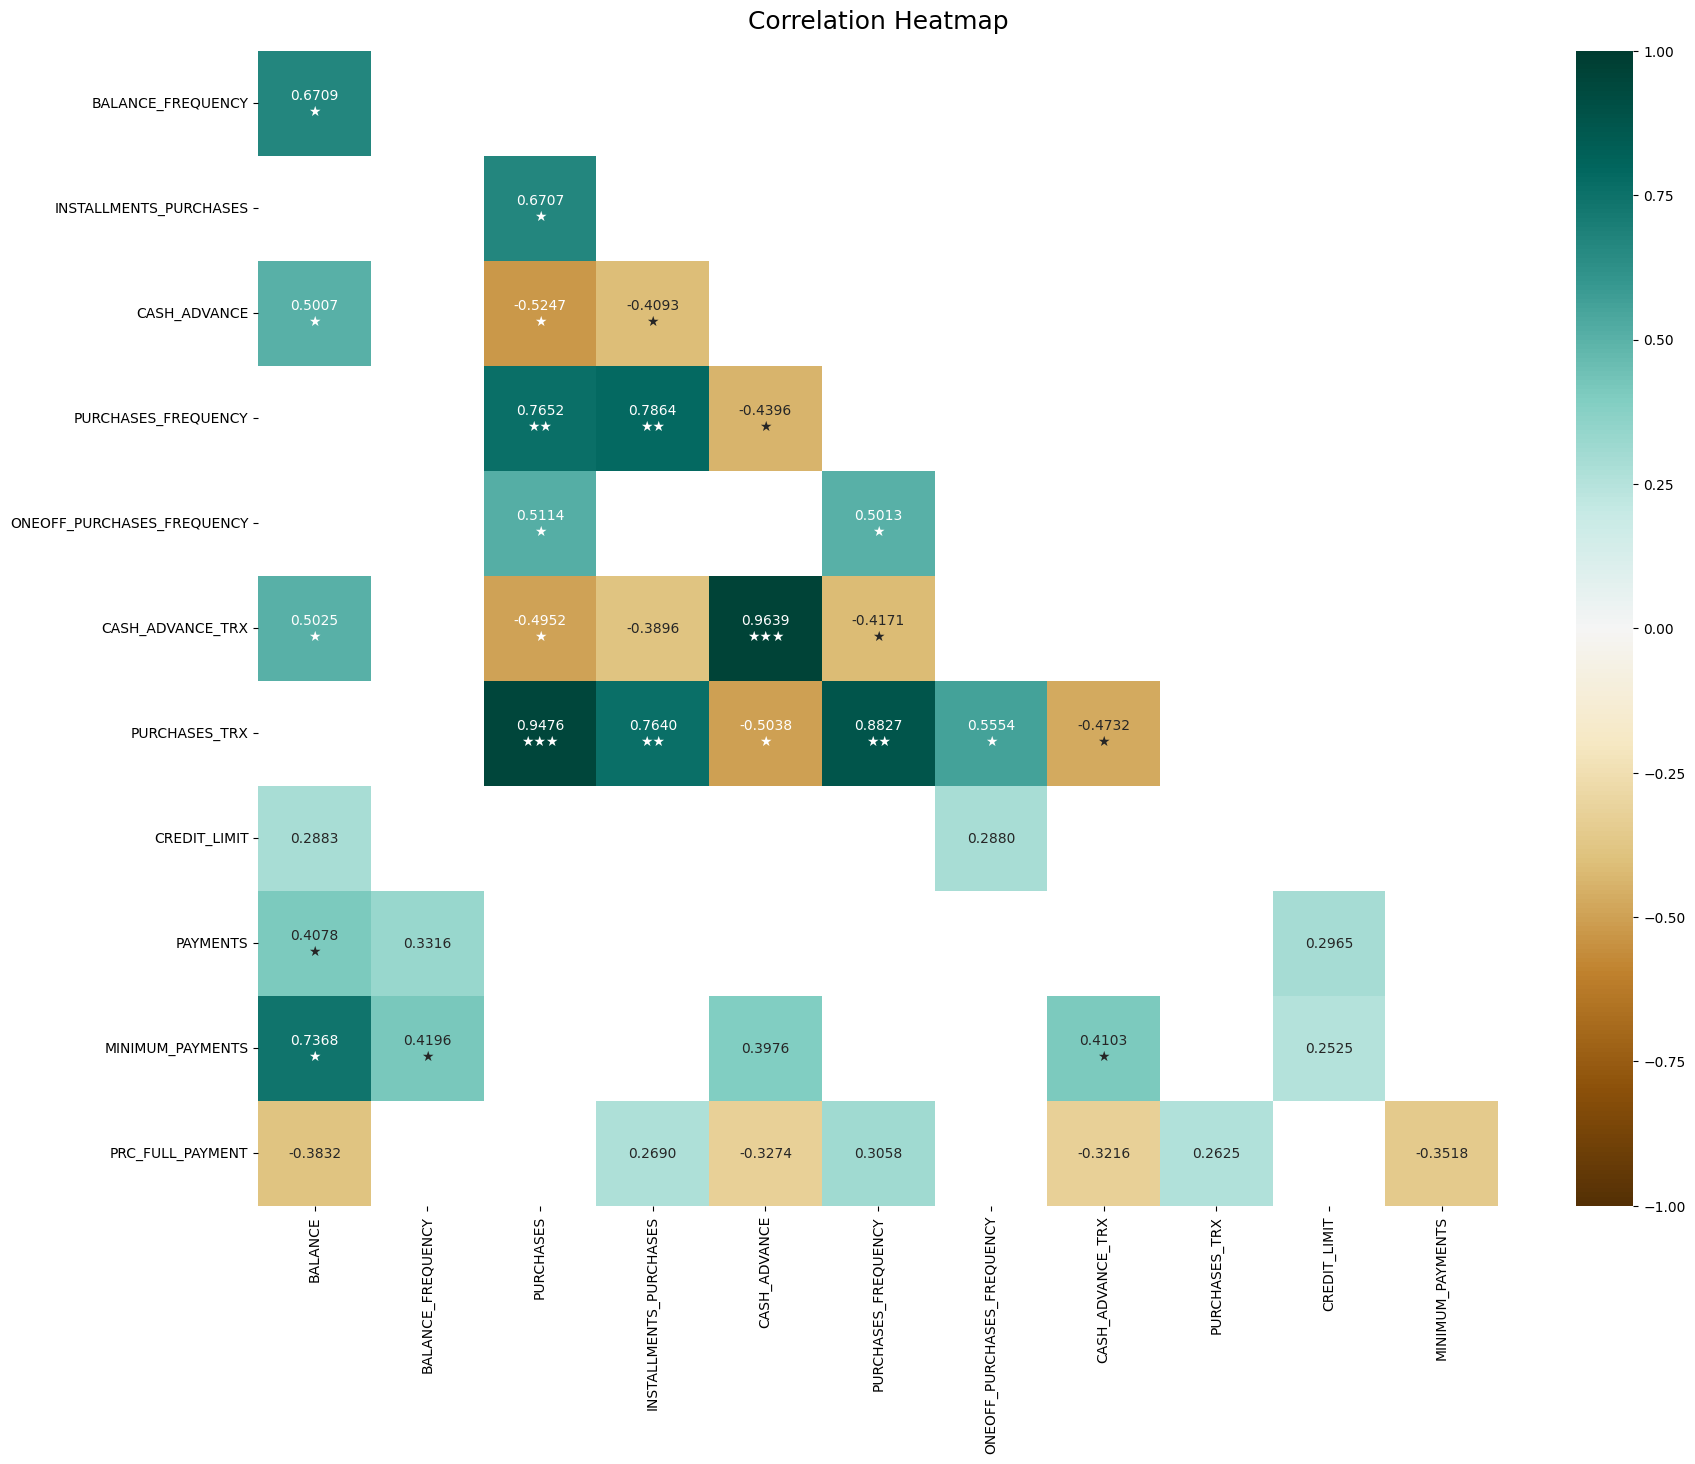

In [ ]:
corr = df.corr()

f, ax = plt.subplots(figsize=(20, 15))

mask = np.triu(np.ones_like(corr, dtype=bool)) #使用np.triu创建一个掩码来隐藏热图的上三角部分，因为相关性矩阵是对称的，上三角和下三角包含相同的信息。

cut_off = 0.25  # only show cells with abs(correlation) at least this value
extreme_1 = 0.4# show with a star
extreme_2 = 0.75  # show with a second star
extreme_3 = 0.9  # show with a third star
mask |= np.abs(corr) < cut_off # 更新了掩码，以便隐藏绝对值小于cut_off的相关性值，这意味着只有那些绝对值大于或等于cut_off的相关性值才会显示在热图上。
corr = corr[~mask]  # fill in NaN in the non-desired cells 填充掩码覆盖的单元格为NaN，实际上隐藏了这些单元格的值。

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
plt.show()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
df_model=df.copy()

scaler= StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df_model), columns = df_model.columns)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.128079,-0.249881,0.049535,0.529049,-0.945641,-0.806649,-0.678716,-0.908489,-0.233714,-1.447161,-0.669773,-0.820493,-0.525588,0.360541
1,0.914608,0.134049,-1.745792,-1.108801,1.418471,-1.221928,-0.678716,0.962664,-1.620405,0.925951,0.940039,0.901696,0.234159,0.360541
2,0.797635,0.517980,0.596764,-1.108801,-0.945641,1.269742,2.673295,-0.908489,0.563938,1.010093,-0.068216,0.448830,-0.525588,0.360541
3,0.608511,-1.017743,0.769970,-1.108801,0.683314,-1.014290,-0.399383,0.299736,-0.528234,1.010093,-4.737629,-0.139740,-0.525588,0.360541
4,0.274787,0.517980,-0.416272,-1.108801,-0.945641,-1.014290,-0.399383,-0.908489,-0.528234,-1.224824,-0.021938,-0.345809,-0.525588,0.360541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-1.297006,0.517980,0.341255,0.795182,-0.945641,1.269742,-0.678716,-0.908489,0.251978,-1.447161,-0.414180,-1.705145,1.183844,-4.126919
8945,-1.481652,0.517980,0.349114,0.802351,-0.945641,1.269742,-0.678716,-0.908489,0.251978,-1.447161,-0.502749,-0.139740,-0.525588,-4.126919
8946,-1.388984,-0.185895,0.157895,0.627905,-0.945641,0.854463,-0.678716,-0.908489,0.170427,-1.447161,-1.155522,-1.264657,0.329128,-4.126919
8947,-1.646773,-0.185895,-1.745792,-1.108801,0.314889,-1.221928,-0.678716,0.625551,-1.620405,-2.292396,-1.388224,-1.594298,0.329128,-4.126919


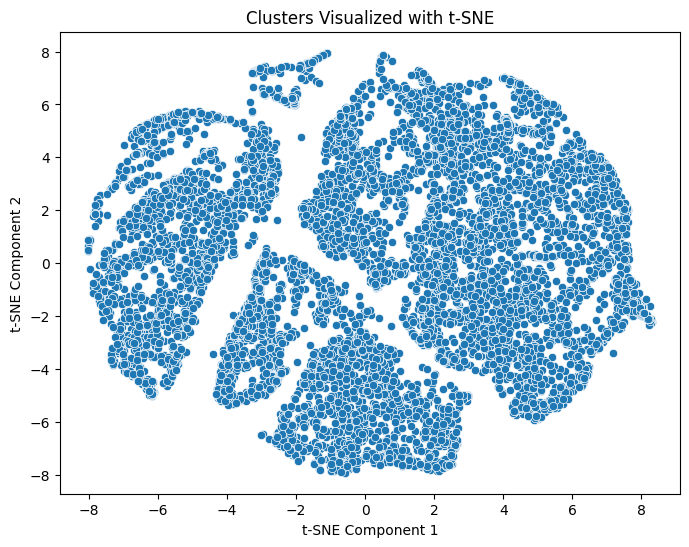

In [ ]:
from matplotlib import rcParams
from sklearn.manifold import TSNE
# Apply t-SNE to reduce dimensions to 2 for visualization
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(df)

# Add the cluster information to the reduced data
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [ ]:
# 删除包含NaN值的行
df.dropna(inplace=True)


In [ ]:
from sklearn.cluster import KMeans

# Kmeans algorithm settings
kmeans_set = {"init":"random", "n_init":10, "max_iter":300, "random_state":42}
# Find inertia for k cluster
inertias = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

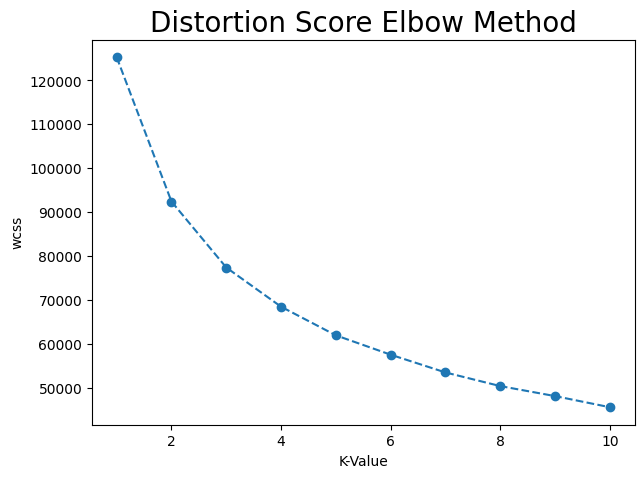

In [ ]:
rcParams['figure.figsize'] = (7, 5);
wcss= []

for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(df)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss, marker='o', linestyle='--')
plt.title('Distortion Score Elbow Method', fontsize =20)
plt.xlabel('K-Value')
plt.ylabel('wcss')
plt.show()



*   使用t-SNE对df进行降维，以便在二维空间进行可视化



In [ ]:
# Number of clusters (K)
n_clusters = 3

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters )

# Fit the model to the scaled data
kmeans.fit(df)

KMeans(n_clusters=3)

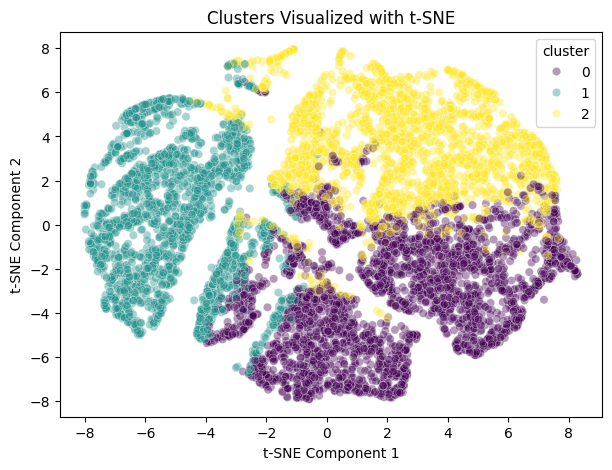

In [ ]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = kmeans.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.4 )
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [ ]:
#assign optimal cluster to kmeans algoritm
# 将K均值聚类算法的聚类中心从标准化后的特征空间转换回原始特征空间
Kmean_pred = KMeans(n_clusters=3, **kmeans_set )
Kmean_pred.fit(df)
labels = Kmean_pred.labels_
#normalize centroids
centroids = pd.DataFrame(data=Kmean_pred.cluster_centers_ , columns = [df.columns])
#real centroids
r_centers = scaler.inverse_transform(centroids)
real_centroids = pd.DataFrame(data = r_centers, columns = [df.columns])
real_centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.823503,0.714447,5.649590,3.406110,-1.876694,0.548415,0.099524,-2.146090,1.778387,7.839537,5.662217,4.906309,0.304680,11.359741
1,7.171958,0.907742,-0.461479,-2.069907,6.806340,0.039031,0.032202,1.410648,-1.538240,8.022035,6.521786,6.295834,0.034052,11.351341
2,7.139852,0.983660,7.068547,4.891526,1.713162,0.791551,0.415478,-0.658554,2.987849,8.353123,7.306313,6.412726,0.125647,11.772076


In [ ]:
# 分析每个聚类中心的特征值
for i, centroid in enumerate(real_centroids.iterrows()):
    print(f"Cluster {i} Features:")
    print(centroid[1])  # 打印每个聚类中心的特征值
    print()

# 比较不同聚类中心之间的差异
centroid_diff = real_centroids.diff().dropna()
print("Difference between Clusters:")
print(centroid_diff)

# 描述每个聚类
for i, centroid in enumerate(real_centroids.iterrows()):
    print(f"Cluster {i} Description:")
    # 根据每个聚类中心的特征值描述聚类特点
    # 例如，如果某个特征值较高，可以描述该聚类为“高消费群体”
    # 如果某个特征值较低，可以描述该聚类为“低消费群体”等等


Cluster 0 Features:
BALANCE                        3.823503
BALANCE_FREQUENCY              0.714447
PURCHASES                      5.649590
INSTALLMENTS_PURCHASES         3.406110
CASH_ADVANCE                  -1.876694
PURCHASES_FREQUENCY            0.548415
ONEOFF_PURCHASES_FREQUENCY     0.099524
CASH_ADVANCE_TRX              -2.146090
PURCHASES_TRX                  1.778387
CREDIT_LIMIT                   7.839537
PAYMENTS                       5.662217
MINIMUM_PAYMENTS               4.906309
PRC_FULL_PAYMENT               0.304680
TENURE                        11.359741
Name: 0, dtype: float64

Cluster 1 Features:
BALANCE                        7.171958
BALANCE_FREQUENCY              0.907742
PURCHASES                     -0.461479
INSTALLMENTS_PURCHASES        -2.069907
CASH_ADVANCE                   6.806340
PURCHASES_FREQUENCY            0.039031
ONEOFF_PURCHASES_FREQUENCY     0.032202
CASH_ADVANCE_TRX               1.410648
PURCHASES_TRX                 -1.538240
CREDIT_LIMIT   

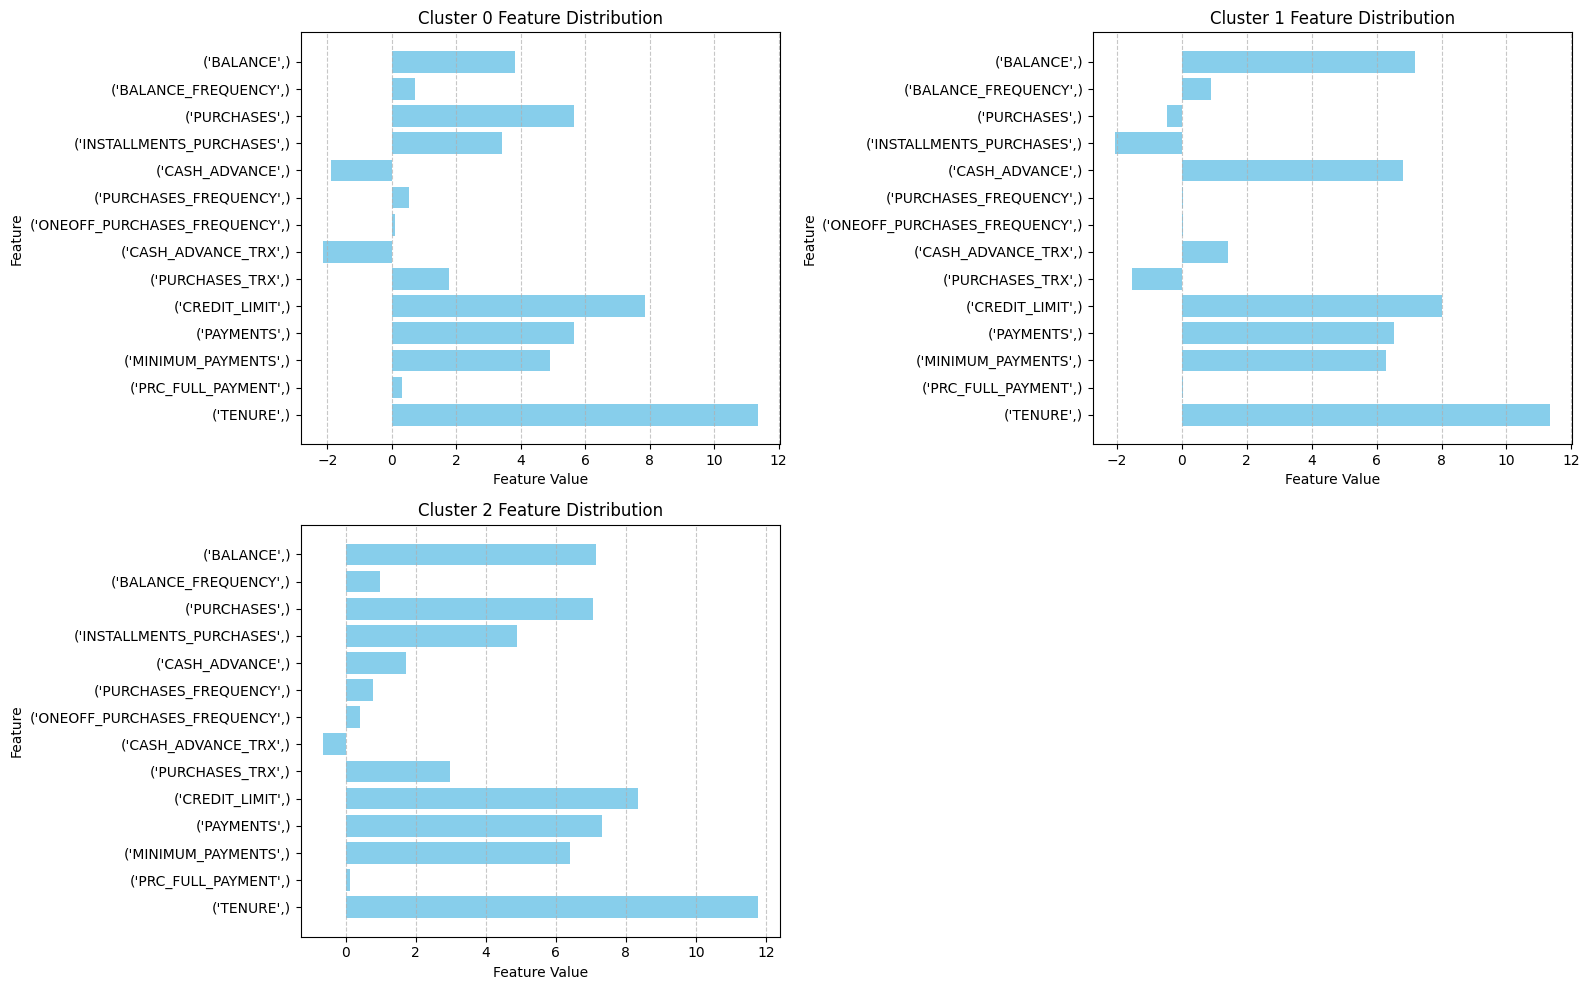

In [ ]:
# 设置图形尺寸
plt.figure(figsize=(16, 10))

# 遍历每个聚类中心，绘制直方图
for i in range(len(real_centroids)):
    cluster_centroid = real_centroids.iloc[i]
    ax = plt.subplot(2, 2, i+1)
    ax.barh([str(feature) for feature in cluster_centroid.index], cluster_centroid.values, color='skyblue')
    ax.set_title(f'Cluster {i} Feature Distribution')
    ax.set_xlabel('Feature Value')
    ax.set_ylabel('Feature')
    ax.invert_yaxis()  # 反转 y 轴，使得特征名称在 y 轴上显示
    ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



    Cluster 0:
        这个客户群在 PURCHASES 和 ONEOFF_PURCHASES 上的平均值较高，意味着这些客户可能更倾向于进行一次性较大额的购买。
        BALANCE 的分布也较高，表明这个群体的客户可能有更高的信用卡余额。
        CASH_ADVANCE 和 CASH_ADVANCE_TRX 较低，暗示这些客户不太使用信用卡预提现金功能。
        TENURE 也显示为正值，这可能表示这个群体中的客户和信用卡公司有较长期的关系。

    Cluster 1:
        在 CASH_ADVANCE 和 CASH_ADVANCE_TRX 上有显著高的值，说明这个群体的客户倾向于更频繁地使用信用卡的现金预付服务。
        ONEOFF_PURCHASES 较低，表明这个群体不太可能进行单笔大额购买。
        PAYMENTS 和 MINIMUM_PAYMENTS 较高，可能意味着这个群体的客户有较高的偿还活动。

    Cluster 2:
        有 BALANCE, PURCHASES_FREQUENCY, 和 INSTALLMENTS_PURCHASES 的较高值，表明这个群体的客户可能会保持较高的账户余额，并且倾向于定期购物和分期付款。
        CASH_ADVANCE 和 CASH_ADVANCE_TRX 的值相对于其他特征较低，这表明这些客户使用现金预付服务的频率较低。
        ONEOFF_PURCHASES_FREQUENCY 的值较低，这暗示这些客户不太经常进行一次性购买。

In [ ]:
# 设置 KMeans 聚类参数
kmeans_set = {
    # 这里可以放置其他 KMeans 的初始化参数，例如初始化方法和随机状态
}

# 对 k=4 进行 KMeans 聚类
kmeans = KMeans(n_clusters=4, **kmeans_set)
kmeans.fit(df)

# 计算聚类评价指数
silhouette_avg = silhouette_score(df, kmeans.labels_)
calinski_harabasz_score_val = calinski_harabasz_score(df, kmeans.labels_)
davies_bouldin_score_val = davies_bouldin_score(df, kmeans.labels_)

In [ ]:
# 打印每个指标的值
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score_val}")
print(f"Davies-Bouldin Score: {davies_bouldin_score_val}")

Silhouette Score: 0.23956140627640654
Calinski-Harabasz Score: 2476.4846060977143
Davies-Bouldin Score: 1.5396978280062092
